In [1]:
#import libraries that we want to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#Read The File from Internet
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
#print each dtypes of variable
print (df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [4]:
#untuk mengetahui correlation antar variabel, kita dapat menggunakan method corr() pada pandas
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [5]:
#mencari correlation antara bore, stroke, compression-ratio, and
#horsepower
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0, 55984.87958403383)

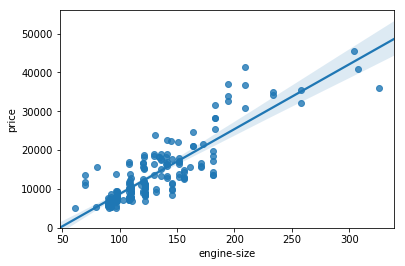

In [6]:
#untuk mengetahui hubungan variabel numerik yang kontinu, 
#dapat menggunakan scatter plot. Kontinu variabel artinya variabel
#yang isinya terdiri dari beberapa range

'''Berikut ini adalah positive linear relationship'''
'''Hubungan antara engine-size dengan price'''
sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

'''Dari gambar tersebut, dapat diketahui kalau semakin besar engine-size,
harga semakin naik'''

In [7]:
'''korelasi antara engine-size dengan price'''
df[["engine-size", "price"]].corr()

'''Nilai 0.87 menandakan ada positive relationship antara kedua
variabel tersebut'''

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


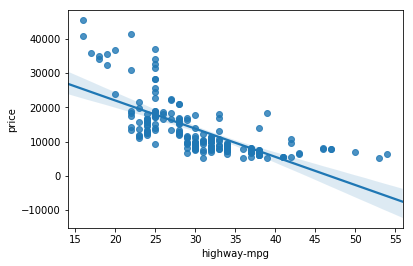

In [8]:
'''Berikut ini adalah negative linear relationship'''
'''Hubungan antara highway-mpg dengan price'''
sns.regplot(x='highway-mpg', y='price', data=df)

'''semakin besar nilai highway-mpg, harga semakin rendah'''

In [9]:
'''nilai correlation antara highway-mpg dengan price'''
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


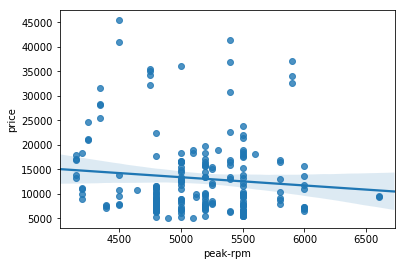

In [11]:
'''Weak Linear Relationship'''
'''Hubungan antara peak-rpm dengan price'''
sns.regplot(x="peak-rpm", y="price", data=df)

'''Karena garisnya hampir horizontal, peak-rpm bukan merupakan
predictor yang bagus untuk price'''

In [12]:
'''nilai correlationnya peak-rpm dengan price'''
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


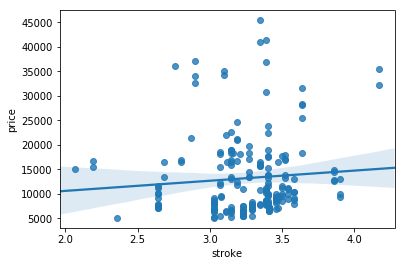

In [13]:
'''Hubungan antara stroke dengan price'''
sns.regplot(x='stroke', y='price', data=df)

'''stroke bukan predictor yang baik untuk price'''

In [15]:
df[["stroke","price"]].corr()

'''Hampir mendekati 0, stroke bukan predictor yang bagus'''

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


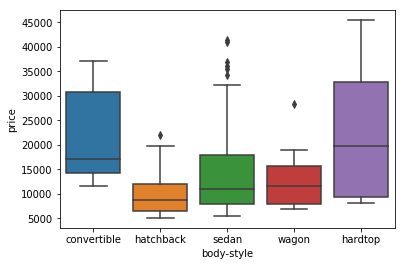

In [16]:
'''categorical variable, dapat dicari dengan 
tipe data object64 atau int64, dapat dicari dengan boxplot'''
'''hubungan antara body-style dan price'''
sns.boxplot(x="body-style", y="price", data=df)

'''Dapat dilihat pada boxplot, distribusi harga untuk kategori
body-style yang hampir sama dan saling overlap, 
sehingga bukan predictor
yang bagus'''

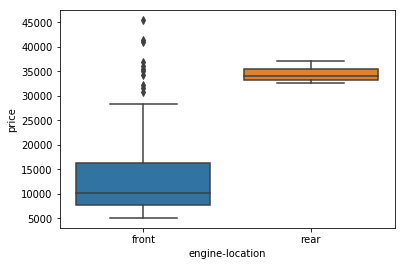

In [18]:
'''Coba cek engine-location dengan price'''
sns.boxplot(x="engine-location", y="price", data=df)

'''Dari boxplot ini, harga untuk engine-location yang berbeda
sangat beda jauh, sehingga menjadi predictor yang bagus'''

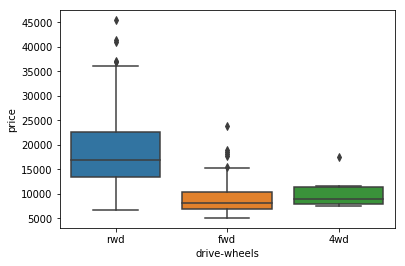

In [19]:
'''Cek drive-wheels dengan price'''
sns.boxplot(x="drive-wheels", y="price", data=df)

'''Distribusi antara price dengan drive-wheels cukup berbeda,
sehingga dapat menjadi predictor dari price'''

In [24]:
#mengetahui statistik tiap fitur dengan describe
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [23]:
#untuk mengetahui tipe data object
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [26]:
'''Menghitung frekuensi data kategorikal menggunakan
value_counts()'''
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [27]:
'''simpan ke kolom baru'''
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels' : 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [28]:
'''ubah nama indexnya jadi drive-wheels'''
drive_wheels_counts.index.name='drive_wheels'
drive_wheels_counts

,value_counts
drive_wheels,
fwd,118
rwd,75
4wd,8


In [30]:
'''Untuk engine-location'''
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns = {'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine_location'
engine_loc_counts.head()

,value_counts
engine_location,
front,198
rear,3


In [31]:
'''GroupBy'''
'''untuk mengelompokkan data yang terdiri dari kategori yang berbeda
Data dikelompokkan berdasarkan bebera variabel dan analisis dilakukan pada
individual grup'''
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [35]:
'''Kita dapat mengetahui tipe drive-wheel mana yang paling berharga'''

df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [36]:
'''Hitung harga rata-rata untuk tiap kategori'''
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

'''Hasilnya, rwd harganya yang paling tinggi'''

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [38]:
'''Kita juga dapat mengelompokkan dengan lebih dari 2 variabel'''
df_group_two= df[['drive-wheels', 'body-style', 'price']]
grouped_test = df_group_two.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [39]:
'''Agar lebih mudah dibaca, dapat dikonversikan ke dalam bentuk
tabel pivot, seperti Excel spreadsheet'''
grouped_pivot = grouped_test.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [40]:
'''Karena ada missing value, kita isi baris tersebut dengan 0'''
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [42]:
'''Kelompokkan harga rata-rata dengan body-style'''
df_group_three = df[['body-style', 'price']]
grouped_test_bodystyle = df_group_three.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


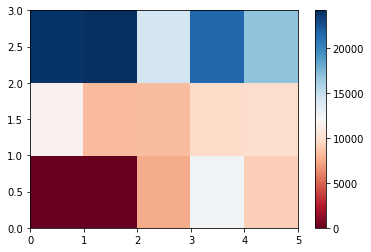

In [43]:
'''Menggunakan heatmap untuk visualisasi hubungan antara body style
dengan price'''
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

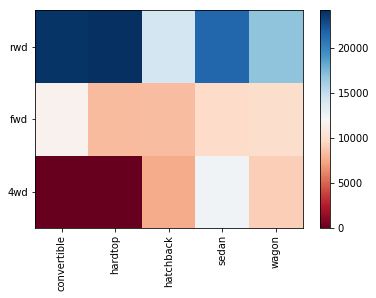

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [45]:
'''What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the

p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
the p-value is  <  0.1: there is weak evidence that the correlation is significant.
the p-value is  >  0.1: there is no evidence that the correlation is significant.'''
from scipy import stats

In [46]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari wheel-base dan price'''
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


In [47]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari horse-power dan price'''
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48


In [48]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari length dan price'''
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.690628380448364  with a P-value of P = 8.016477466159053e-30


In [49]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari width dan price'''
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.7512653440522674  with a P-value of P = 9.200335510481426e-38


In [50]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari curb-weight dan price'''
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.8344145257702846  with a P-value of P = 2.1895772388936997e-53


In [51]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari engine-size dan price'''
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


In [52]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari bore dan price'''
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is 0.5431553832626602  with a P-value of P = 8.049189483935364e-17


In [53]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari city-mpg dan price'''
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29


In [54]:
'''Menghitung Pearson Correlation Coefficient dan P-Value 
dari highway-mpg dan price'''
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print("The PCC is", pearson_coef, " with a P-value of P =", p_value)

The PCC is -0.7046922650589529  with a P-value of P = 1.7495471144476807e-31


In [57]:
'''Doing ANOVA'''
'''Membandingkan nilai rata-rata dua atau lebih grup'''

'''Melihat apakah tipe yang berbeda dari drive-wheels mempengaruhi harga'''
grouped_test2 = df_group_two[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [58]:
df_group_two

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
5,fwd,sedan,15250.0
6,fwd,sedan,17710.0
7,fwd,wagon,18920.0
8,fwd,sedan,23875.0
9,rwd,sedan,16430.0


In [60]:
'''Mencari harga grup 4wd'''
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [62]:
'''Mencari F-test score dan P-Value menggunakan metode f_oneway'''
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'],
                             grouped_test2.get_group('4wd')['price'])

print("Hasil ANOVA: F=", f_val, ", P =", p_val)

Hasil ANOVA: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [63]:
'''Coba hanya fwd dan rwd'''
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], 
                              grouped_test2.get_group('rwd')['price'])
print("Hasil ANOVA: F=", f_val, ", P =", p_val)

Hasil ANOVA: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [64]:
'''4wd dan rwd'''
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('rwd')['price'])

print("Hasil ANOVA: F=", f_val, ", P =", p_val)

Hasil ANOVA: F= 8.580681368924756 , P = 0.004411492211225333


In [65]:
'''4wd dan fwd'''
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'],grouped_test2.get_group('fwd')['price'])

print("Hasil ANOVA: F=", f_val, ", P =", p_val)

Hasil ANOVA: F= 0.665465750252303 , P = 0.41620116697845666
